<a href="https://colab.research.google.com/github/AdayanaV/Investimento-Quanti/blob/main/An%C3%A1lise_1_Trade_Quantitativo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [6]:
## Run This Cell for Colab
!pip install yfinance
!pip install vectorbt
!pip install quantstats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import vectorbt as vbt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Definindo parâmetros

In [8]:
# Análise de um Ativo Americano
codigo = 'AAPL'
ativos_comparacao = [codigo, '^GSPC', 'AMZN', 'NFLX']

data_inicial = '2018-01-01'  
data_final = '2019-01-01'

# Os preços de fechamentos dos ativos
vbt.YFData.download(ativos_comparacao, start=data_inicial, end=data_final).get('Close')

symbol,AAPL,^GSPC,AMZN,NFLX
Date,,,,
2018-01-02 05:00:00+00:00,40.950485,2695.810059,59.450500,201.070007
2018-01-03 05:00:00+00:00,40.943359,2713.060059,60.209999,205.050003
2018-01-04 05:00:00+00:00,41.133541,2723.989990,60.479500,205.630005
2018-01-05 05:00:00+00:00,41.601871,2743.149902,61.457001,209.990005
2018-01-08 05:00:00+00:00,41.447346,2747.709961,62.343498,212.050003
...,...,...,...,...
2018-12-24 05:00:00+00:00,35.429188,2351.100098,67.197998,233.880005
2018-12-26 05:00:00+00:00,37.924168,2467.699951,73.544998,253.669998
2018-12-27 05:00:00+00:00,37.678047,2488.830078,73.082001,255.570007


## Baixando os dados

In [9]:
precos = vbt.YFData.download(codigo, start=data_inicial, end=data_final).get()
fechamento = vbt.YFData.download(codigo, start=data_inicial, end=data_final).get('Close')

# Analisando a Série

In [10]:
fechamento.vbt.plot().show()

In [11]:
precos.vbt.ohlcv.plot().show()

## Gráfico comparativo

Com investimento inicial de \$1 (ou R\$ 1)

In [12]:
vbt.YFData.download(ativos_comparacao,
                    start=data_inicial,
                    end=data_final).plot(column='Close', base=1).show()

## Gráfico Quant Stat

Retorno Cumulativo, Drawdown e Retorno Diário

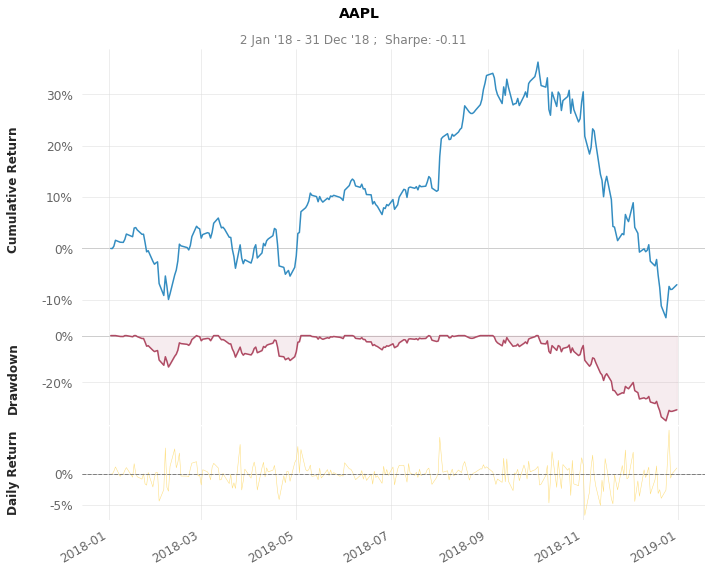

In [13]:
warnings.filterwarnings('ignore')

retornos = fechamento.vbt.to_returns()
retornos.vbt.returns.qs.plot_snapshot(title=codigo)

# Analisando Estratégias de Trade

## Simple Moving Averages

In [14]:
n_periodos_curta = 20
n_periodos_longa = 50

media_curta = vbt.MA.run(fechamento, n_periodos_curta, short_name='media_curta')
media_longa = vbt.MA.run(fechamento, n_periodos_longa, short_name='media_longa')

fig = fechamento.vbt.plot(trace_kwargs=dict(name='Preço de Fechamento'))
media_curta.ma.vbt.plot(trace_kwargs=dict(name='Média Móvel Curta'), fig=fig)
media_longa.ma.vbt.plot(trace_kwargs=dict(name='Média Móvel Longa'), fig=fig)

fig.show()

Quando a media movel curta cruza longa para cima é uma oportunidade de compra. Quando cruza para baixo é uma oportunidade de venda.

## Relative Strength Index

In [15]:
rsi = vbt.RSI.run(fechamento)
rsi.plot().show()

O RSI é uma das melhores formas de aanalisar a situçao e as tendencias do mercado financeiro. Significa indice de força relativa.
De 20 a 60 indica que nao é um bom momento para vender, porque o ativo esta desvalorizado.
De 60 a 80 a um certo tipo de equilibrio, é provavel que seja um periodo de transiçao, onde é melhor conservar. os periodos anteriores.

## Stochastics

The TA-Lib Stoch function returns two lines slowk and slowd which can then be used to generate the buy/sell indicators.
A crossover signal occurs when the two lines cross in the overbought region (commonly above 80) or oversold region (commonly below 20).
When a slowk line crosses below the slowd line in the overbought region it is considered a sell indicator.
Conversely, when an increasing slowk line crosses above the slowd line in the oversold region it is considered a buy indicator.

In [16]:
vbt.STOCH.run(precos['High'], precos['Low'], precos['Close']).plot().show()

O indicador estocastico é representado por duas linhas a K e a D, a linha. K é a linha mais rapida e é calculada pela divisao entre a diferencao do preço do fechamento e a menor minima do periodo.
A curva D é um sinal para curva K onde a curva D curzou por cima da curva K logo isso indica a nao indicacao para compra, quanto mais proximo o indicador estiver do zero, maior é a probabilidade de venda, enquanto o indicador estiver proximo de 100 indica compra.
Pesquise sobre o indicador estocástico e escreva aqui a interpretação do gráfico acima.

## Bollinger Bands

In [17]:
vbt.BBANDS.run(fechamento).plot().show()

Bandas de bollinger sao indicadores utilizados para medir a volatilidade do preço de uma açao, estimando o valor maximo de valorizaçao e minimo de desvalorizaçao do ativo como base em sua media movel.
Os preços estrapolam os limites das bandas em raros momentos
**Pesquise sobre bandas de bolinger e escreva aqui a interpretação do gráfico acima.**